In [ ]:
# test c function's inner product 

In [2]:
ln <- load("/gpfs/loomis/project/zhao/zy92/GTEX/output/training_preparation_data_chr2_1.RData")
ln

[1] "X_train"         "Y_train"         "X_tune"          "Y_tune"         
 [5] "XX_train"        "XY"              "Xnorm"           "lam_V"          
 [9] "initial_numeric" "single_est"      "X"

In [3]:
dim(X_train[[1]])

[1]  228 6092

In [69]:
dim(X_train[[1]])

[1]  228 6092

In [45]:
# parameters
lam = 1
X=X_train
Y=Y_train
X1=X_tune
Y1=Y_tune
XX=XX_train
XY=XY
Xnorm=Xnorm
lambda1=lam_V[lam]
lambda2=lam_V[lam]
single_est = matrix(initial_numeric, ncol(X_train[[1]]), 49)
theta=single_est
maxiter = 10

In [46]:
sum(is.infinite(initial_numeric))
sum(is.na(initial_numeric))

[1] 0

[1] 0

In [64]:
head(Xnorm)
length(Xnorm)

GTEX-1117F GTEX-111CU GTEX-111FC GTEX-111VG GTEX-111YS GTEX-1122O 
  2.007385   1.371409   1.730872   2.037611   2.168466   1.144572

[1] 838

In [66]:
test_mtx <- matrix(1, 5, 10)
t(test_mtx) %*% test_mtx

5,5,5,5,5,5,5,5,5,5
5,5,5,5,5,5,5,5,5,5
5,5,5,5,5,5,5,5,5,5
5,5,5,5,5,5,5,5,5,5
5,5,5,5,5,5,5,5,5,5
5,5,5,5,5,5,5,5,5,5
5,5,5,5,5,5,5,5,5,5
5,5,5,5,5,5,5,5,5,5
5,5,5,5,5,5,5,5,5,5
5,5,5,5,5,5,5,5,5,5


In [68]:
M

[1] 6092

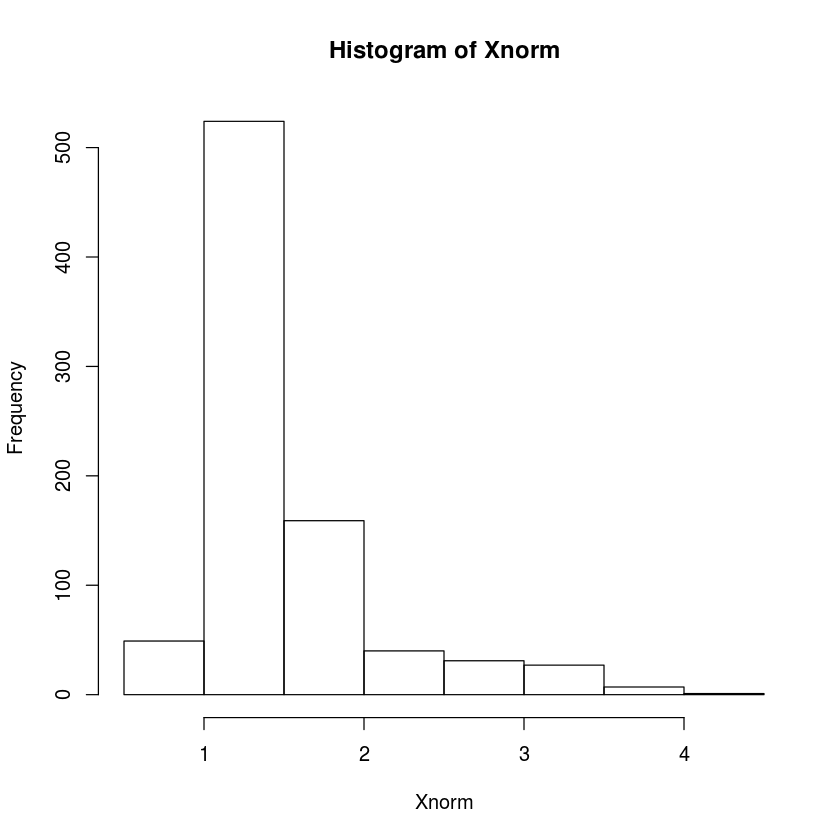

In [65]:
hist(Xnorm)

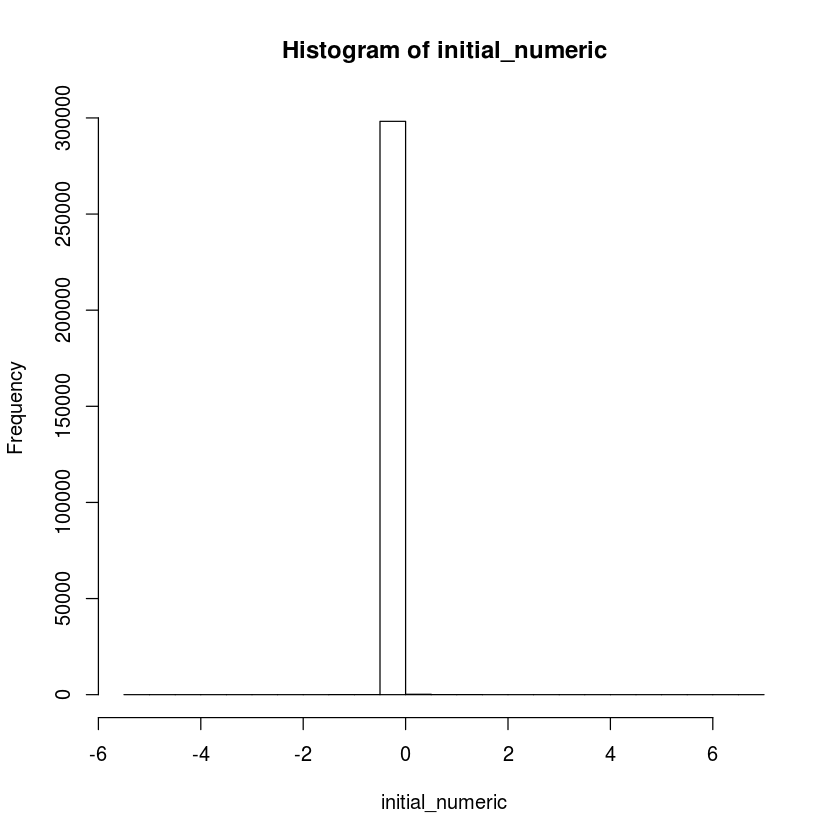

In [47]:
hist(initial_numeric)

In [48]:
sum(initial_numeric == 0)

[1] 298110

In [49]:
length(initial_numeric)

[1] 298508

In [50]:
sum(is.infinite(theta))
sum(is.na(theta))

[1] 0

[1] 0

In [51]:
#theta = matrix(0, ncol(X_train[[1]]), 49)

In [53]:
# wrapper function 
#dyn.load("/ysm-gpfs/pi/zhao/zy92/projects/utmost_update/CTIMP/optim.so")
dyn.load("/gpfs/project/zhao/zy92/utmost_update/CTIMP/optim.so")

bgt = Sys.time()
M = nrow(XY)
P = length(X)
NN = unlist(lapply(X, nrow))
old_objV1 = 0
for(t in 1:P){
    old_objV1 = old_objV1 + 1/2*mean((Y[[t]]-X[[t]]%*%theta[,t])^2)
}
IRdisplay::display_html(paste0("Training error: ", old_objV1, '\n'))
old_objV2 = 0
for(t in 1:P){
    old_objV2 = old_objV2 + 1/2*mean((Y1[[t]]-X1[[t]]%*%theta[,t])^2)
}
IRdisplay::display_html(paste0("Testing error: ", old_objV2, '\n'))
beta_j_lasso = rep(0, P)
beta_j_lasso_matrix = rep(0, M*P)
output_res = rep(0, P)
tmp_XYj = 0



Training error: 787.928110082842

Testing error: 989.803739515436

In [54]:
sum(is.na(theta))
sum(is.infinite(theta))

[1] 0

[1] 0

In [55]:
res = .Call("wrapper", XX, XY, theta, M, P, beta_j_lasso, beta_j_lasso_matrix, lambda1, lambda2, Xnorm, output_res)



In [56]:
sum(is.infinite(theta))
sum(is.na(theta))

[1] 0

[1] 0

In [57]:
sum(is.infinite(beta_j_lasso_matrix))
sum(is.na(beta_j_lasso_matrix))

[1] 0

[1] 0

In [58]:
head(beta_j_lasso_matrix)

[1]  18.64978  78.90558  18.64978 202.41808  18.64978 202.55028

In [60]:
beta_j_lasso_matrix[1]
beta_j_lasso_matrix[1+M]



[1] 18.64978

[1] 18.64978

In [29]:
sum(is.na(beta_j_lasso_matrix))
sum(is.infinite(beta_j_lasso_matrix))
sum(is.na(beta_j_lasso))
sum(is.infinite(beta_j_lasso))

[1] 0

[1] 0

[1] 0

[1] 0

In [31]:
length(beta_j_lasso)
beta_j_lasso

[1] 49

[1] -21.660491 -17.222920 -24.148788 -20.767931 -26.747314 -19.698669
 [7] -33.159582   0.000000 -19.811750 -23.538030 -20.641221 -26.104589
[13] -23.821108 -19.978411 -25.625547 -17.638360 -21.232809 -24.667711
[19] -30.682620 -18.689066 -20.801241  -7.886451 -14.498150 -22.267208
[25] -16.273157 -19.550766 -18.814765 -25.123793 -19.845803 -60.282167
[31] -25.217068 -19.308026 -29.057655 -19.139265 -16.198471 -22.042184
[37] -25.431804 -18.245533 -24.810723 -18.886708 -19.447656 -37.570117
[43]   0.000000 -24.340677 -24.382977 -17.324005 -17.090872 -22.874956
[49] -17.100707

In [12]:



for(i in 1:maxiter){
    bgt = Sys.time()
    res = .Call("wrapper", XX, XY, theta, M, P, beta_j_lasso, beta_j_lasso_matrix, lambda1, lambda2, Xnorm, output_res)
    #IRdisplay::display_html(res)
    edt = Sys.time()
    #print(edt-bgt)
    IRdisplay::display_html(beta_j_lasso)
    #IRdisplay::display_html(theta[1:6, 1:6])
    new_objV1 = new_objV2 = 0
    for(t in 1:P){
        if (theta[])
        new_objV1 = new_objV1 + 1/2*mean((Y[[t]]-X[[t]]%*%theta[,t])^2)
        #IRdisplay::display_html(sum(is.na(X[[t]])))
        #IRdisplay::display_html(sum(is.na(Y[[t]])))
        #IRdisplay::display_html(theta[,t])
    }
    IRdisplay::display_html(paste0("Training error: ", new_objV1, '\n'))
    for(t in 1:P){
        new_objV2 = new_objV2 + 1/2*mean((Y1[[t]]-X1[[t]]%*%theta[,t])^2)
        #IRdisplay::display_html(sum(is.na(X[[t]])))
        #IRdisplay::display_html(sum(is.na(Y[[t]])))
        #IRdisplay::display_html(theta[,t])
    }
    IRdisplay::display_html(paste0("Testing error: ", new_objV2, '\n'))
    if(new_objV2 > old_objV2|new_objV1 > old_objV1){
        break
    }else{
        old_objV2 = new_objV2
    }
    if(abs(new_objV1-old_objV1) < eps){
        break
    }else{
        old_objV1 = new_objV1
    }
}
#edt = Sys.time()
#print(edt-bgt)
#list(est = theta, tune_err = new_objV2)

Warning message in if (theta[]) new_objV1 = new_objV1 + 1/2 * mean((Y[[t]] - X[[t]] %*% :
“the condition has length > 1 and only the first element will be used”
Warning message in if (theta[]) new_objV1 = new_objV1 + 1/2 * mean((Y[[t]] - X[[t]] %*% :
“the condition has length > 1 and only the first element will be used”
Warning message in if (theta[]) new_objV1 = new_objV1 + 1/2 * mean((Y[[t]] - X[[t]] %*% :
“the condition has length > 1 and only the first element will be used”
Warning message in if (theta[]) new_objV1 = new_objV1 + 1/2 * mean((Y[[t]] - X[[t]] %*% :
“the condition has length > 1 and only the first element will be used”
Warning message in if (theta[]) new_objV1 = new_objV1 + 1/2 * mean((Y[[t]] - X[[t]] %*% :
“the condition has length > 1 and only the first element will be used”
Warning message in if (theta[]) new_objV1 = new_objV1 + 1/2 * mean((Y[[t]] - X[[t]] %*% :
“the condition has length > 1 and only the first element will be used”
Warning message in if (theta[]) ne

Training error: NaN

Testing error: NaN

ERROR: Error in if (new_objV2 > old_objV2 | new_objV1 > old_objV1) {: missing value where TRUE/FALSE needed


In [13]:
sum(is.na(theta))
sum(is.infinite(theta))

[1] 344

[1] 254685